In [2]:
import sys
print('Python: {}'.format(sys.version))

Python: 2.7.13 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]


In [3]:
import scipy
print('scipy: {}'.format(scipy.__version__))

scipy: 0.19.0


In [4]:
import numpy
print('numpy: {}'.format(numpy.__version__))

numpy: 1.12.1


In [5]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 2.0.2


In [9]:
import pandas as pd
print('pandas: {}'.format(pandas.__version__))

pandas: 0.20.1


In [7]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.18.1


In [11]:
# Load libraries
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
tfile=pd.read_csv('D:\Projects\exp\GBV dashboard\calc_data\Chargeback.csv')

In [13]:
df_file = pd.DataFrame(tfile)

In [14]:
print(df_file.shape)

(25, 44)


In [15]:
print(df_file.head(20))

    GLMonth  Trans-GL   1           0          -1          -2          -3  \
0   2017-06     42887       772118.99  2284290.30  1275728.29  1122714.69   
1   2017-05     42856      1513703.00  2771407.66  1824410.00  1146750.17   
2   2017-04     42826      1475484.03  3026184.26  1400831.78   929369.18   
3   2017-03     42795      2134643.91  2630446.95  1684180.34  1329315.04   
4   2017-02     42767      1089938.72  2358174.82  1600827.58   972264.84   
5   2017-01     42736      1416371.01  2917047.57  1430931.15  1167044.18   
6   2016-12     42705  70  1494374.94  2292625.58  1534240.83  1012796.66   
7   2016-11     42675      1167208.92  2384841.17  1397292.88  1081408.36   
8   2016-10     42644      1438958.11  2408295.68  1768291.68  1191745.88   
9   2016-09     42614      1309047.50  2735404.93  2005491.82  1164639.24   
10  2016-08     42583      1544681.37  3170933.10  1901312.39  1304066.75   
11  2016-07     42552      1592728.57  2571886.26  1797368.90  1209640.49   

In [16]:
print(df_file.describe())

          Trans-GL             0            -1            -2            -3  \
count     25.00000  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01   
mean   42521.92000  1.368880e+06  2.610953e+06  1.642041e+06  1.158483e+06   
std      224.22569  2.871843e+05  3.674658e+05  2.131380e+05  1.737426e+05   
min    42156.00000  7.721190e+05  1.755959e+06  1.261664e+06  9.188590e+05   
25%    42339.00000  1.198615e+06  2.351072e+06  1.478392e+06  1.012797e+06   
50%    42522.00000  1.438958e+06  2.660932e+06  1.676016e+06  1.149779e+06   
75%    42705.00000  1.514872e+06  2.917048e+06  1.797369e+06  1.225261e+06   
max    42887.00000  2.134644e+06  3.170933e+06  2.005492e+06  1.570485e+06   

                  -4             -5           -6             -7  \
count      25.000000      25.000000      25.0000      25.000000   
mean   665196.333200  382037.136800  227027.5164  126619.331600   
std     97640.130681   77362.532377   50889.9484   33858.183743   
min    465072.520000  245888.

In [17]:
# class distribution
print(df_file.groupby('GLMonth').size())

GLMonth
2015-06    1
2015-07    1
2015-08    1
2015-09    1
2015-10    1
2015-11    1
2015-12    1
2016-01    1
2016-02    1
2016-03    1
2016-04    1
2016-05    1
2016-06    1
2016-07    1
2016-08    1
2016-09    1
2016-10    1
2016-11    1
2016-12    1
2017-01    1
2017-02    1
2017-03    1
2017-04    1
2017-05    1
2017-06    1
dtype: int64


In [18]:
# plots

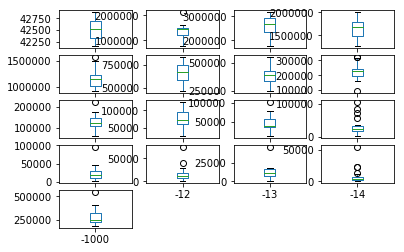

In [22]:
df_file.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.show();

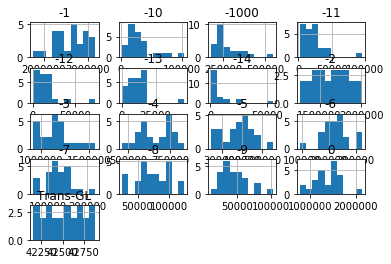

In [23]:
df_file.hist()
plt.show()

In [24]:
del df_file['Trans-GL']

In [26]:
del df_file['1']

In [27]:
df_file

,GLMonth,0,-1,-2,-3,-4,-5,-6,-7,-8,...,-31,-32,-33,-34,-35,-36,-37,-38,-42,-1000
0,2017-06,772118.99,2284290.30,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,...,,,,,,,,,,547930.59
1,2017-05,1513703.00,2771407.66,1824410.00,1146750.17,668603.31,364770.05,179569.15,146562.66,62038.48,...,,,342.60,,,,261.61,,,279118.50
2,2017-04,1475484.03,3026184.26,1400831.78,929369.18,572188.45,245921.64,162181.67,60879.85,51915.40,...,,1091.10,1813.98,,,,,,,230660.46
3,2017-03,2134643.91,2630446.95,1684180.34,1329315.04,588745.18,356320.63,215560.76,144196.93,115534.06,...,,,,,,,,,,221460.11
4,2017-02,1089938.72,2358174.82,1600827.58,972264.84,581413.99,294432.16,242554.72,174257.40,95476.39,...,,,,,504.03,,2347.19,,,188283.56
5,2017-01,1416371.01,2917047.57,1430931.15,1167044.18,751235.80,434116.47,271609.61,144490.34,100999.05,...,,,,,,,,,,179158.18
6,2016-12,1494374.94,2292625.58,1534240.83,1012796.66,722284.57,429350.19,321393.68,139333.55,64050.43,...,359.50,,,482.00,1191.00,374.80,5496.04,6475.70,,237021.36
7,2016-11,1167208.92,2384841.17,1397292.88,1081408.36,737924.20,447198.53,315078.72,144182.75,99949.53,...,,,,,557.01,,,,247.99,224967.59
8,2016-10,1438958.11,2408295.68,1768291.68,1191745.88,738206.74,370313.21,228460.35,221427.06,95278.77,...,,,,,,,,,,230297.85
9,2016-09,1309047.50,2735404.93,2005491.82,1164639.24,697065.04,368795.50,323314.03,130103.81,49278.64,...,,,,,,,,,,250095.54


In [28]:
df_file.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
GLMonth,2017-06,2017-05,2017-04,2017-03,2017-02,2017-01,2016-12,2016-11,2016-10,2016-09,...,2016-03,2016-02,2016-01,2015-12,2015-11,2015-10,2015-09,2015-08,2015-07,2015-06
0,772119,1.5137e+06,1.47548e+06,2.13464e+06,1.08994e+06,1.41637e+06,1.49437e+06,1.16721e+06,1.43896e+06,1.30905e+06,...,1.63186e+06,1.10176e+06,1.24787e+06,965270,872236,1.232e+06,1.19861e+06,1.49294e+06,1.6124e+06,1.31631e+06
-1,2.28429e+06,2.77141e+06,3.02618e+06,2.63045e+06,2.35817e+06,2.91705e+06,2.29263e+06,2.38484e+06,2.4083e+06,2.7354e+06,...,2.70991e+06,2.35107e+06,2.25905e+06,1.75596e+06,2.00382e+06,2.26302e+06,2.83132e+06,3.09174e+06,3.02191e+06,2.69159e+06
-2,1.27573e+06,1.82441e+06,1.40083e+06,1.68418e+06,1.60083e+06,1.43093e+06,1.53424e+06,1.39729e+06,1.76829e+06,2.00549e+06,...,1.67602e+06,1.55435e+06,1.26166e+06,1.51366e+06,1.42803e+06,1.91142e+06,1.99754e+06,1.75145e+06,1.67656e+06,1.47839e+06
-3,1.12271e+06,1.14675e+06,929369,1.32932e+06,972265,1.16704e+06,1.0128e+06,1.08141e+06,1.19175e+06,1.16464e+06,...,1.22107e+06,941501,1.10466e+06,1.14978e+06,1.41505e+06,1.50432e+06,1.22787e+06,939787,918859,985957
-4,556715,668603,572188,588745,581414,751236,722285,737924,738207,697065,...,620655,610402,578804,834242,755917,735374,607035,516746,567101,465073
-5,304210,364770,245922,356321,294432,434116,429350,447199,370313,368796,...,394034,390197,421034,553214,483959,375781,276449,336119,282529,245888
-6,197798,179569,162182,215561,242555,271610,321394,315079,228460,323314,...,238881,250203,243981,267853,232534,196562,194496,181455,206625,92037.5
-7,119293,146563,60879.8,144197,174257,144490,139334,144183,221427,130104,...,150327,119722,131837,162660,116776,136183,107725,113473,75894,65805.1
-8,124010,62038.5,51915.4,115534,95476.4,100999,64050.4,99949.5,95278.8,49278.6,...,83066.8,79113.5,56033.2,91093.4,95957.1,61571.6,72321,76217.9,30795.8,25574.9


In [29]:
df_file

,GLMonth,0,-1,-2,-3,-4,-5,-6,-7,-8,...,-31,-32,-33,-34,-35,-36,-37,-38,-42,-1000
0,2017-06,772118.99,2284290.30,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,...,,,,,,,,,,547930.59
1,2017-05,1513703.00,2771407.66,1824410.00,1146750.17,668603.31,364770.05,179569.15,146562.66,62038.48,...,,,342.60,,,,261.61,,,279118.50
2,2017-04,1475484.03,3026184.26,1400831.78,929369.18,572188.45,245921.64,162181.67,60879.85,51915.40,...,,1091.10,1813.98,,,,,,,230660.46
3,2017-03,2134643.91,2630446.95,1684180.34,1329315.04,588745.18,356320.63,215560.76,144196.93,115534.06,...,,,,,,,,,,221460.11
4,2017-02,1089938.72,2358174.82,1600827.58,972264.84,581413.99,294432.16,242554.72,174257.40,95476.39,...,,,,,504.03,,2347.19,,,188283.56
5,2017-01,1416371.01,2917047.57,1430931.15,1167044.18,751235.80,434116.47,271609.61,144490.34,100999.05,...,,,,,,,,,,179158.18
6,2016-12,1494374.94,2292625.58,1534240.83,1012796.66,722284.57,429350.19,321393.68,139333.55,64050.43,...,359.50,,,482.00,1191.00,374.80,5496.04,6475.70,,237021.36
7,2016-11,1167208.92,2384841.17,1397292.88,1081408.36,737924.20,447198.53,315078.72,144182.75,99949.53,...,,,,,557.01,,,,247.99,224967.59
8,2016-10,1438958.11,2408295.68,1768291.68,1191745.88,738206.74,370313.21,228460.35,221427.06,95278.77,...,,,,,,,,,,230297.85
9,2016-09,1309047.50,2735404.93,2005491.82,1164639.24,697065.04,368795.50,323314.03,130103.81,49278.64,...,,,,,,,,,,250095.54


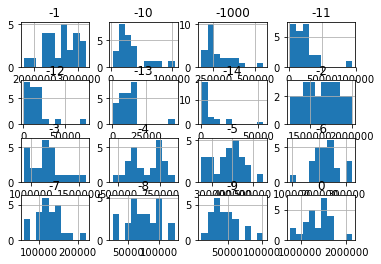

In [30]:
df_file.hist()
plt.show()

In [31]:
df_file.mean(axis = 0)
# Passing the argument of axis=0 returns the mean of every single column in the DataFrame

0        1.368880e+06
-1       2.610953e+06
-2       1.642041e+06
-3       1.158483e+06
-4       6.651963e+05
-5       3.820371e+05
-6       2.270275e+05
-7       1.266193e+05
-8       7.431505e+04
-9       4.596441e+04
-10      3.152189e+04
-11      2.344332e+04
-12      1.552059e+04
-13      1.163731e+04
-14      7.961200e+03
-1000    2.781519e+05
dtype: float64

In [32]:
ax0_test = df_file.mean(axis = 0)

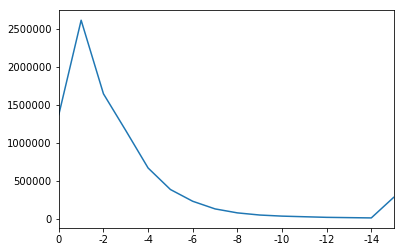

In [33]:
ax0_test.plot()
plt.show()

In [34]:
df_file.mean(axis = 1)
# Passing the argument of axis=1 will return the mean of every single row in the DataFrame

0     483362.715625
1     571117.125625
2     518565.801250
3     603566.137500
4     485542.263125
5     567291.305625
6     523594.850625
7     507949.665625
8     546627.757500
9     568503.770000
10    604336.212500
11    579081.821875
12    618424.159375
13    587073.443750
14    582518.684375
15    566146.553750
16    487475.393750
17    483523.318750
18    479093.633125
19    492841.755625
20    551265.855625
21    561144.176250
22    559842.540625
23    543896.810000
24    473703.338750
dtype: float64

In [35]:
ax1_test = df_file.mean(axis = 1)

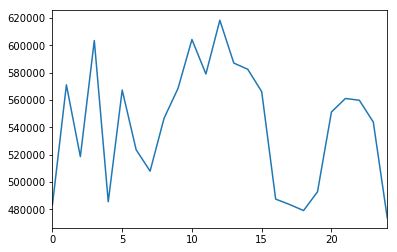

In [36]:
ax1_test.plot()
plt.show()

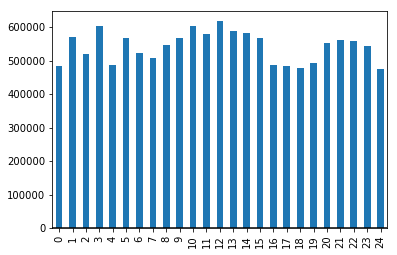

In [38]:
ax1_test.plot(kind='bar'); plt.axhline(0, color = 'k')
plt.show()
# Avg CB amount by GL Months

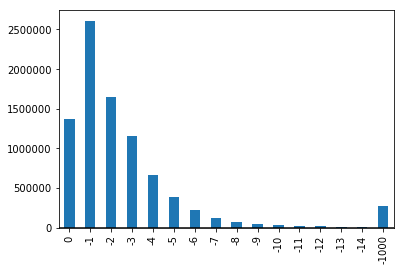

In [40]:
ax0_test.plot(kind='bar'); plt.axhline(0, color = 'k')
plt.show()
# Avg CB amount by [Trans-GL] (difference between TransDate month and GLMonth)

D:\Programs\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


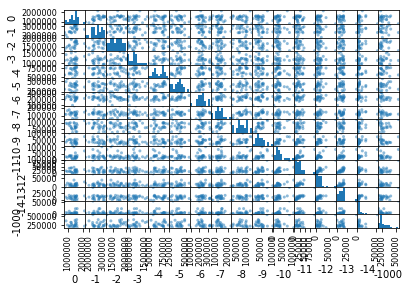

In [41]:
# scatter plot matrix
scatter_matrix(df_file)
plt.show()

In [42]:
# Algorithms

In [43]:
print(df_file.shape)

(25, 42)


In [48]:
df_file[0:1]

,GLMonth,0,-1,-2,-3,-4,-5,-6,-7,-8,...,-31,-32,-33,-34,-35,-36,-37,-38,-42,-1000
0,2017-06,772118.99,2284290.3,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,...,,,,,,,,,,547930.59


In [52]:
df_file.ix[:,41:42]

,-1000
0,547930.59
1,279118.50
2,230660.46
3,221460.11
4,188283.56
5,179158.18
6,237021.36
7,224967.59
8,230297.85
9,250095.54


In [85]:
df_file = df_file.replace(r'\s+', numpy.nan, regex=True)
# to remove empty spaces with NaN

In [86]:
df_file

,GLMonth,0,-1,-2,-3,-4,-5,-6,-7,-8,...,-31,-32,-33,-34,-35,-36,-37,-38,-42,-1000
0,2017-06,772118.99,2284290.30,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547930.59
1,2017-05,1513703.00,2771407.66,1824410.00,1146750.17,668603.31,364770.05,179569.15,146562.66,62038.48,...,NaN,NaN,342.60,NaN,NaN,NaN,261.61,NaN,NaN,279118.50
2,2017-04,1475484.03,3026184.26,1400831.78,929369.18,572188.45,245921.64,162181.67,60879.85,51915.40,...,NaN,1091.10,1813.98,NaN,NaN,NaN,NaN,NaN,NaN,230660.46
3,2017-03,2134643.91,2630446.95,1684180.34,1329315.04,588745.18,356320.63,215560.76,144196.93,115534.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221460.11
4,2017-02,1089938.72,2358174.82,1600827.58,972264.84,581413.99,294432.16,242554.72,174257.40,95476.39,...,NaN,NaN,NaN,NaN,504.03,NaN,2347.19,NaN,NaN,188283.56
5,2017-01,1416371.01,2917047.57,1430931.15,1167044.18,751235.80,434116.47,271609.61,144490.34,100999.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179158.18
6,2016-12,1494374.94,2292625.58,1534240.83,1012796.66,722284.57,429350.19,321393.68,139333.55,64050.43,...,359.50,NaN,NaN,482.00,1191.00,374.80,5496.04,6475.70,NaN,237021.36
7,2016-11,1167208.92,2384841.17,1397292.88,1081408.36,737924.20,447198.53,315078.72,144182.75,99949.53,...,NaN,NaN,NaN,NaN,557.01,NaN,NaN,NaN,247.99,224967.59
8,2016-10,1438958.11,2408295.68,1768291.68,1191745.88,738206.74,370313.21,228460.35,221427.06,95278.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230297.85
9,2016-09,1309047.50,2735404.93,2005491.82,1164639.24,697065.04,368795.50,323314.03,130103.81,49278.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250095.54


In [73]:
df_file.ix[:,1:42]

,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,...,-31,-32,-33,-34,-35,-36,-37,-38,-42,-1000
0,772118.99,2284290.30,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,76187.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547930.59
1,1513703.00,2771407.66,1824410.00,1146750.17,668603.31,364770.05,179569.15,146562.66,62038.48,46933.64,...,NaN,NaN,342.60,NaN,NaN,NaN,261.61,NaN,NaN,279118.50
2,1475484.03,3026184.26,1400831.78,929369.18,572188.45,245921.64,162181.67,60879.85,51915.40,46604.94,...,NaN,1091.10,1813.98,NaN,NaN,NaN,NaN,NaN,NaN,230660.46
3,2134643.91,2630446.95,1684180.34,1329315.04,588745.18,356320.63,215560.76,144196.93,115534.06,77840.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221460.11
4,1089938.72,2358174.82,1600827.58,972264.84,581413.99,294432.16,242554.72,174257.40,95476.39,56806.24,...,NaN,NaN,NaN,NaN,504.03,NaN,2347.19,NaN,NaN,188283.56
5,1416371.01,2917047.57,1430931.15,1167044.18,751235.80,434116.47,271609.61,144490.34,100999.05,53306.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179158.18
6,1494374.94,2292625.58,1534240.83,1012796.66,722284.57,429350.19,321393.68,139333.55,64050.43,59441.23,...,359.50,NaN,NaN,482.00,1191.00,374.80,5496.04,6475.70,NaN,237021.36
7,1167208.92,2384841.17,1397292.88,1081408.36,737924.20,447198.53,315078.72,144182.75,99949.53,58149.94,...,NaN,NaN,NaN,NaN,557.01,NaN,NaN,NaN,247.99,224967.59
8,1438958.11,2408295.68,1768291.68,1191745.88,738206.74,370313.21,228460.35,221427.06,95278.77,35468.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230297.85
9,1309047.50,2735404.93,2005491.82,1164639.24,697065.04,368795.50,323314.03,130103.81,49278.64,25956.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250095.54


In [93]:
df_file2 = df_file.ix[:,0:16]

In [94]:
df_file2

,GLMonth,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14
0,2017-06,772118.99,2284290.30,1275728.29,1122714.69,556715.05,304210.16,197798.16,119293.42,124009.93,76187.36,82526.94,95093.15,74147.01,46115.85,54923.56
1,2017-05,1513703.00,2771407.66,1824410.00,1146750.17,668603.31,364770.05,179569.15,146562.66,62038.48,46933.64,56033.20,27306.25,15777.79,12061.73,22828.42
2,2017-04,1475484.03,3026184.26,1400831.78,929369.18,572188.45,245921.64,162181.67,60879.85,51915.40,46604.94,30656.43,22898.79,15206.05,15587.16,10482.73
3,2017-03,2134643.91,2630446.95,1684180.34,1329315.04,588745.18,356320.63,215560.76,144196.93,115534.06,77840.62,71421.49,29106.74,28574.77,16169.86,13540.81
4,2017-02,1089938.72,2358174.82,1600827.58,972264.84,581413.99,294432.16,242554.72,174257.40,95476.39,56806.24,28381.84,38087.43,17372.25,18236.77,12167.50
5,2017-01,1416371.01,2917047.57,1430931.15,1167044.18,751235.80,434116.47,271609.61,144490.34,100999.05,53306.60,104372.55,45409.96,38841.23,16364.23,5362.96
6,2016-12,1494374.94,2292625.58,1534240.83,1012796.66,722284.57,429350.19,321393.68,139333.55,64050.43,59441.23,19045.84,23546.73,16734.50,7732.07,3545.45
7,2016-11,1167208.92,2384841.17,1397292.88,1081408.36,737924.20,447198.53,315078.72,144182.75,99949.53,58149.94,33692.81,15364.19,8777.60,6378.79,4778.67
8,2016-10,1438958.11,2408295.68,1768291.68,1191745.88,738206.74,370313.21,228460.35,221427.06,95278.77,35468.25,9912.60,4086.94,4261.80,205.00,834.20
9,2016-09,1309047.50,2735404.93,2005491.82,1164639.24,697065.04,368795.50,323314.03,130103.81,49278.64,25956.63,13106.20,7865.39,4267.12,8111.91,3517.02


In [95]:
# Create validation dataset

#Split out validation dataset

array = df_file2.values

In [96]:
X = array[:,1:16] # only columns without NaN
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [97]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [98]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.000000 (0.000000)


ZeroDivisionError: float division by zero

In [99]:
array

array([['2017-06', 772118.99, 2284290.3, 1275728.29, 1122714.69, 556715.05,
        304210.16, 197798.16, 119293.42, 124009.93, 76187.36, 82526.94,
        95093.15, 74147.01, 46115.85, 54923.56],
       ['2017-05', 1513703.0, 2771407.66, 1824410.0, 1146750.17, 668603.31,
        364770.05, 179569.15, 146562.66, 62038.48, 46933.64, 56033.2,
        27306.25, 15777.79, 12061.73, 22828.42],
       ['2017-04', 1475484.03, 3026184.26, 1400831.78, 929369.18,
        572188.45, 245921.64, 162181.67, 60879.85, 51915.4, 46604.94,
        30656.43, 22898.79, 15206.05, 15587.16, 10482.73],
       ['2017-03', 2134643.91, 2630446.95, 1684180.34, 1329315.04,
        588745.18, 356320.63, 215560.76, 144196.93, 115534.06, 77840.62,
        71421.49, 29106.74, 28574.77, 16169.86, 13540.81],
       ['2017-02', 1089938.72, 2358174.82, 1600827.58, 972264.84,
        581413.99, 294432.16, 242554.72, 174257.4, 95476.39, 56806.24,
        28381.84, 38087.43, 17372.25, 18236.77, 12167.5],
       ['2017-01', 

In [100]:
array[:,1:16]

array([[772118.99, 2284290.3, 1275728.29, 1122714.69, 556715.05, 304210.16,
        197798.16, 119293.42, 124009.93, 76187.36, 82526.94, 95093.15,
        74147.01, 46115.85, 54923.56],
       [1513703.0, 2771407.66, 1824410.0, 1146750.17, 668603.31, 364770.05,
        179569.15, 146562.66, 62038.48, 46933.64, 56033.2, 27306.25,
        15777.79, 12061.73, 22828.42],
       [1475484.03, 3026184.26, 1400831.78, 929369.18, 572188.45,
        245921.64, 162181.67, 60879.85, 51915.4, 46604.94, 30656.43,
        22898.79, 15206.05, 15587.16, 10482.73],
       [2134643.91, 2630446.95, 1684180.34, 1329315.04, 588745.18,
        356320.63, 215560.76, 144196.93, 115534.06, 77840.62, 71421.49,
        29106.74, 28574.77, 16169.86, 13540.81],
       [1089938.72, 2358174.82, 1600827.58, 972264.84, 581413.99,
        294432.16, 242554.72, 174257.4, 95476.39, 56806.24, 28381.84,
        38087.43, 17372.25, 18236.77, 12167.5],
       [1416371.01, 2917047.57, 1430931.15, 1167044.18, 751235.8,
        

In [60]:
print df_file.replace(r'\s+', numpy.nan, regex=True)

    GLMonth           0          -1          -2          -3         -4  \
0   2017-06   772118.99  2284290.30  1275728.29  1122714.69  556715.05   
1   2017-05  1513703.00  2771407.66  1824410.00  1146750.17  668603.31   
2   2017-04  1475484.03  3026184.26  1400831.78   929369.18  572188.45   
3   2017-03  2134643.91  2630446.95  1684180.34  1329315.04  588745.18   
4   2017-02  1089938.72  2358174.82  1600827.58   972264.84  581413.99   
5   2017-01  1416371.01  2917047.57  1430931.15  1167044.18  751235.80   
6   2016-12  1494374.94  2292625.58  1534240.83  1012796.66  722284.57   
7   2016-11  1167208.92  2384841.17  1397292.88  1081408.36  737924.20   
8   2016-10  1438958.11  2408295.68  1768291.68  1191745.88  738206.74   
9   2016-09  1309047.50  2735404.93  2005491.82  1164639.24  697065.04   
10  2016-08  1544681.37  3170933.10  1901312.39  1304066.75  649266.56   
11  2016-07  1592728.57  2571886.26  1797368.90  1209640.49  787065.48   
12  2016-06  1514871.82  2993600.56  1